### Convolutional Neural Network Project - Fashion MNIST Classification

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

In [2]:
#Loading data
(X_train,y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print((X_train.shape),(y_train.shape))

(60000, 28, 28) (60000,)


In [4]:
print((X_test.shape),(y_test.shape))

(10000, 28, 28) (10000,)


In [5]:
X_train[0] #image data in 2D numpy array shape 28 x 28 pixels

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
y_train[0] #9 => Ankle boot

9

In [7]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

### Showing image

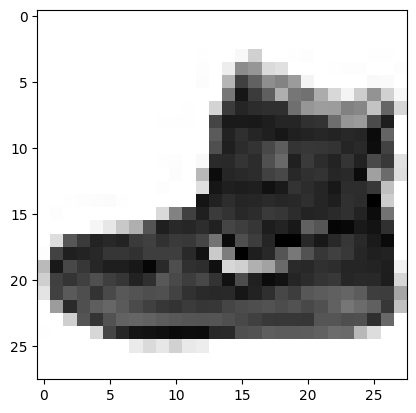

In [8]:
plt.imshow(X_train[0], cmap='Greys');

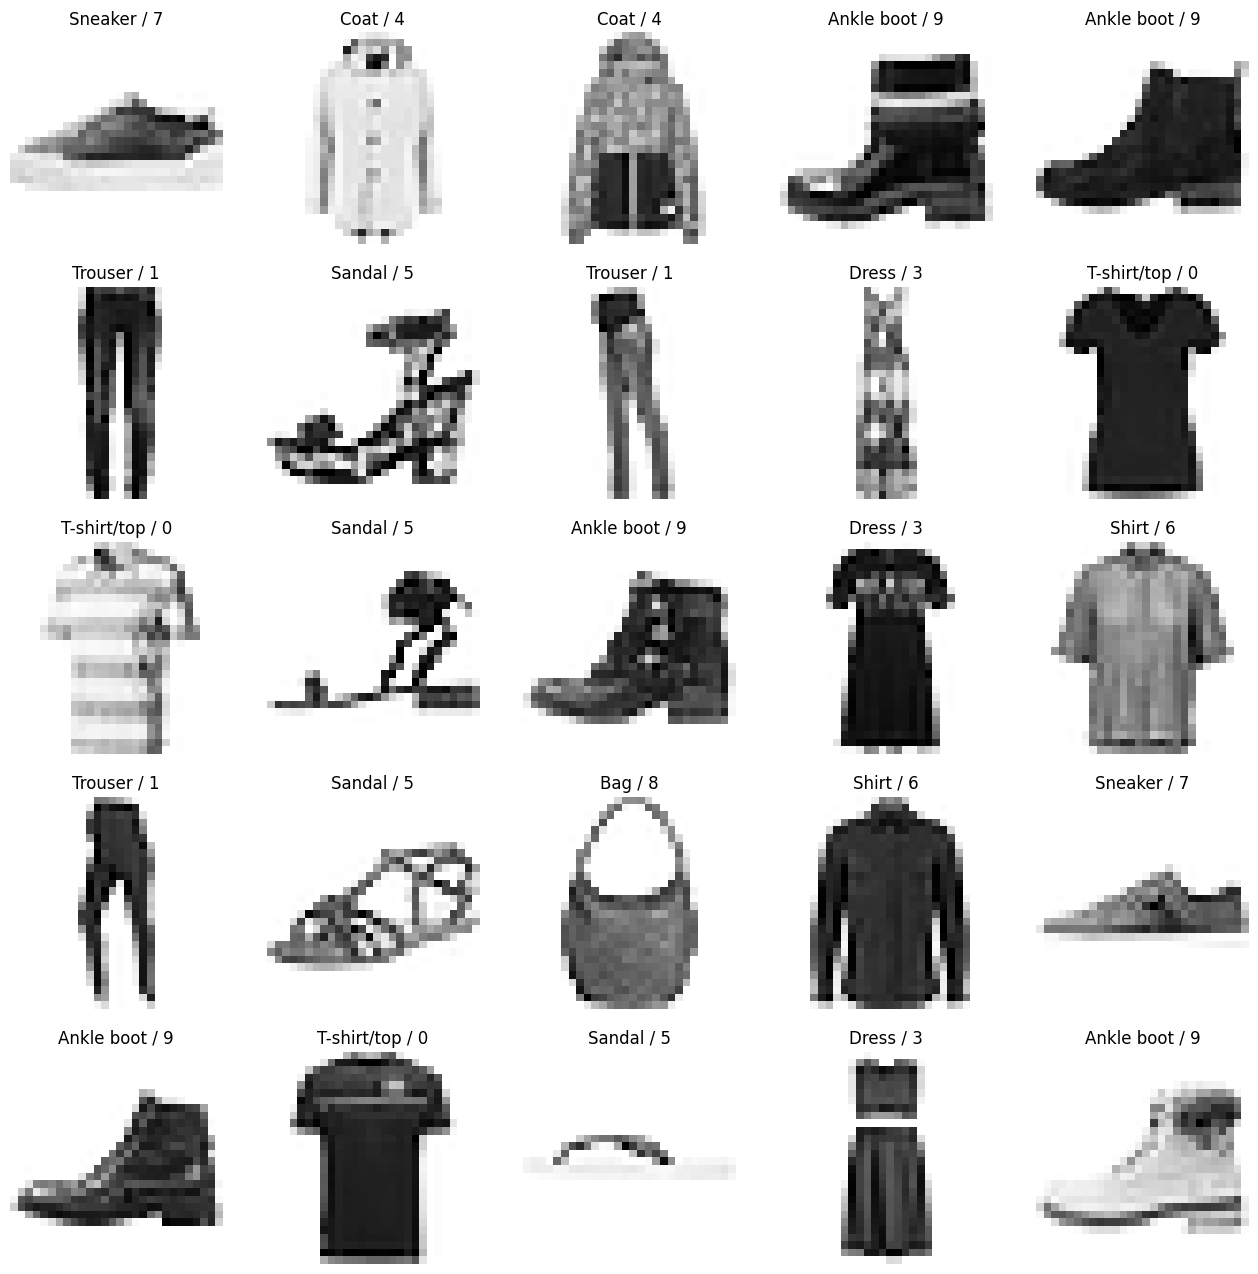

In [9]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
   plt.subplot(5,5,j); j+=1
   plt.imshow(X_train[i], cmap="Greys")
   plt.axis('off') #off the axis
   plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

#### Change Dimension

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train.ndim

3

In [12]:
#Model Building ANN
#Feature Scaling
X_train = X_train/255.0
X_test = X_test/255.0

In [13]:
#Splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [14]:
print((X_train.shape),(y_train.shape))

(48000, 28, 28) (48000,)


In [15]:
print((X_validation.shape), (y_validation.shape))

(12000, 28, 28) (12000,)


In [16]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

In [17]:
ANN_model = keras.models.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(units=128,activation='relu'),
                        keras.layers.Dense(units=32,activation='relu'),
                        keras.layers.Dense(units=10,activation='softmax')
                                    ])

In [18]:
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [19]:
#Compiling the model
ANN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [20]:

#Training CNN model
ANN_model.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/20
94/94 [==============================] - 6s 7ms/step - loss: 0.8037 - accuracy: 0.7296 - val_loss: 0.5137 - val_accuracy: 0.8239
Epoch 2/20
94/94 [==============================] - 0s 4ms/step - loss: 0.4703 - accuracy: 0.8367 - val_loss: 0.4484 - val_accuracy: 0.8390
Epoch 3/20
94/94 [==============================] - 1s 5ms/step - loss: 0.4160 - accuracy: 0.8545 - val_loss: 0.4274 - val_accuracy: 0.8504
Epoch 4/20
94/94 [==============================] - 1s 9ms/step - loss: 0.3911 - accuracy: 0.8609 - val_loss: 0.3947 - val_accuracy: 0.8621
Epoch 5/20
94/94 [==============================] - 0s 4ms/step - loss: 0.3638 - accuracy: 0.8709 - val_loss: 0.3820 - val_accuracy: 0.8617
Epoch 6/20
94/94 [==============================] - 0s 5ms/step - loss: 0.3507 - accuracy: 0.8764 - val_loss: 0.3679 - val_accuracy: 0.8684
Epoch 7/20
94/94 [==============================] - 1s 7ms/step - loss: 0.3334 - accuracy: 0.8804 - val_loss: 0.3537 - val_accuracy: 0.8748
Epoch 8/20
94/94 [==

In [21]:

y_pred = ANN_model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 1s 2ms/step


array([[0.  , 0.  , 0.  , ..., 0.06, 0.  , 0.93],
       [0.  , 0.  , 0.99, ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

In [22]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [23]:
ANN_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3367 - accuracy: 0.8817


[0.3367267847061157, 0.8816999793052673]

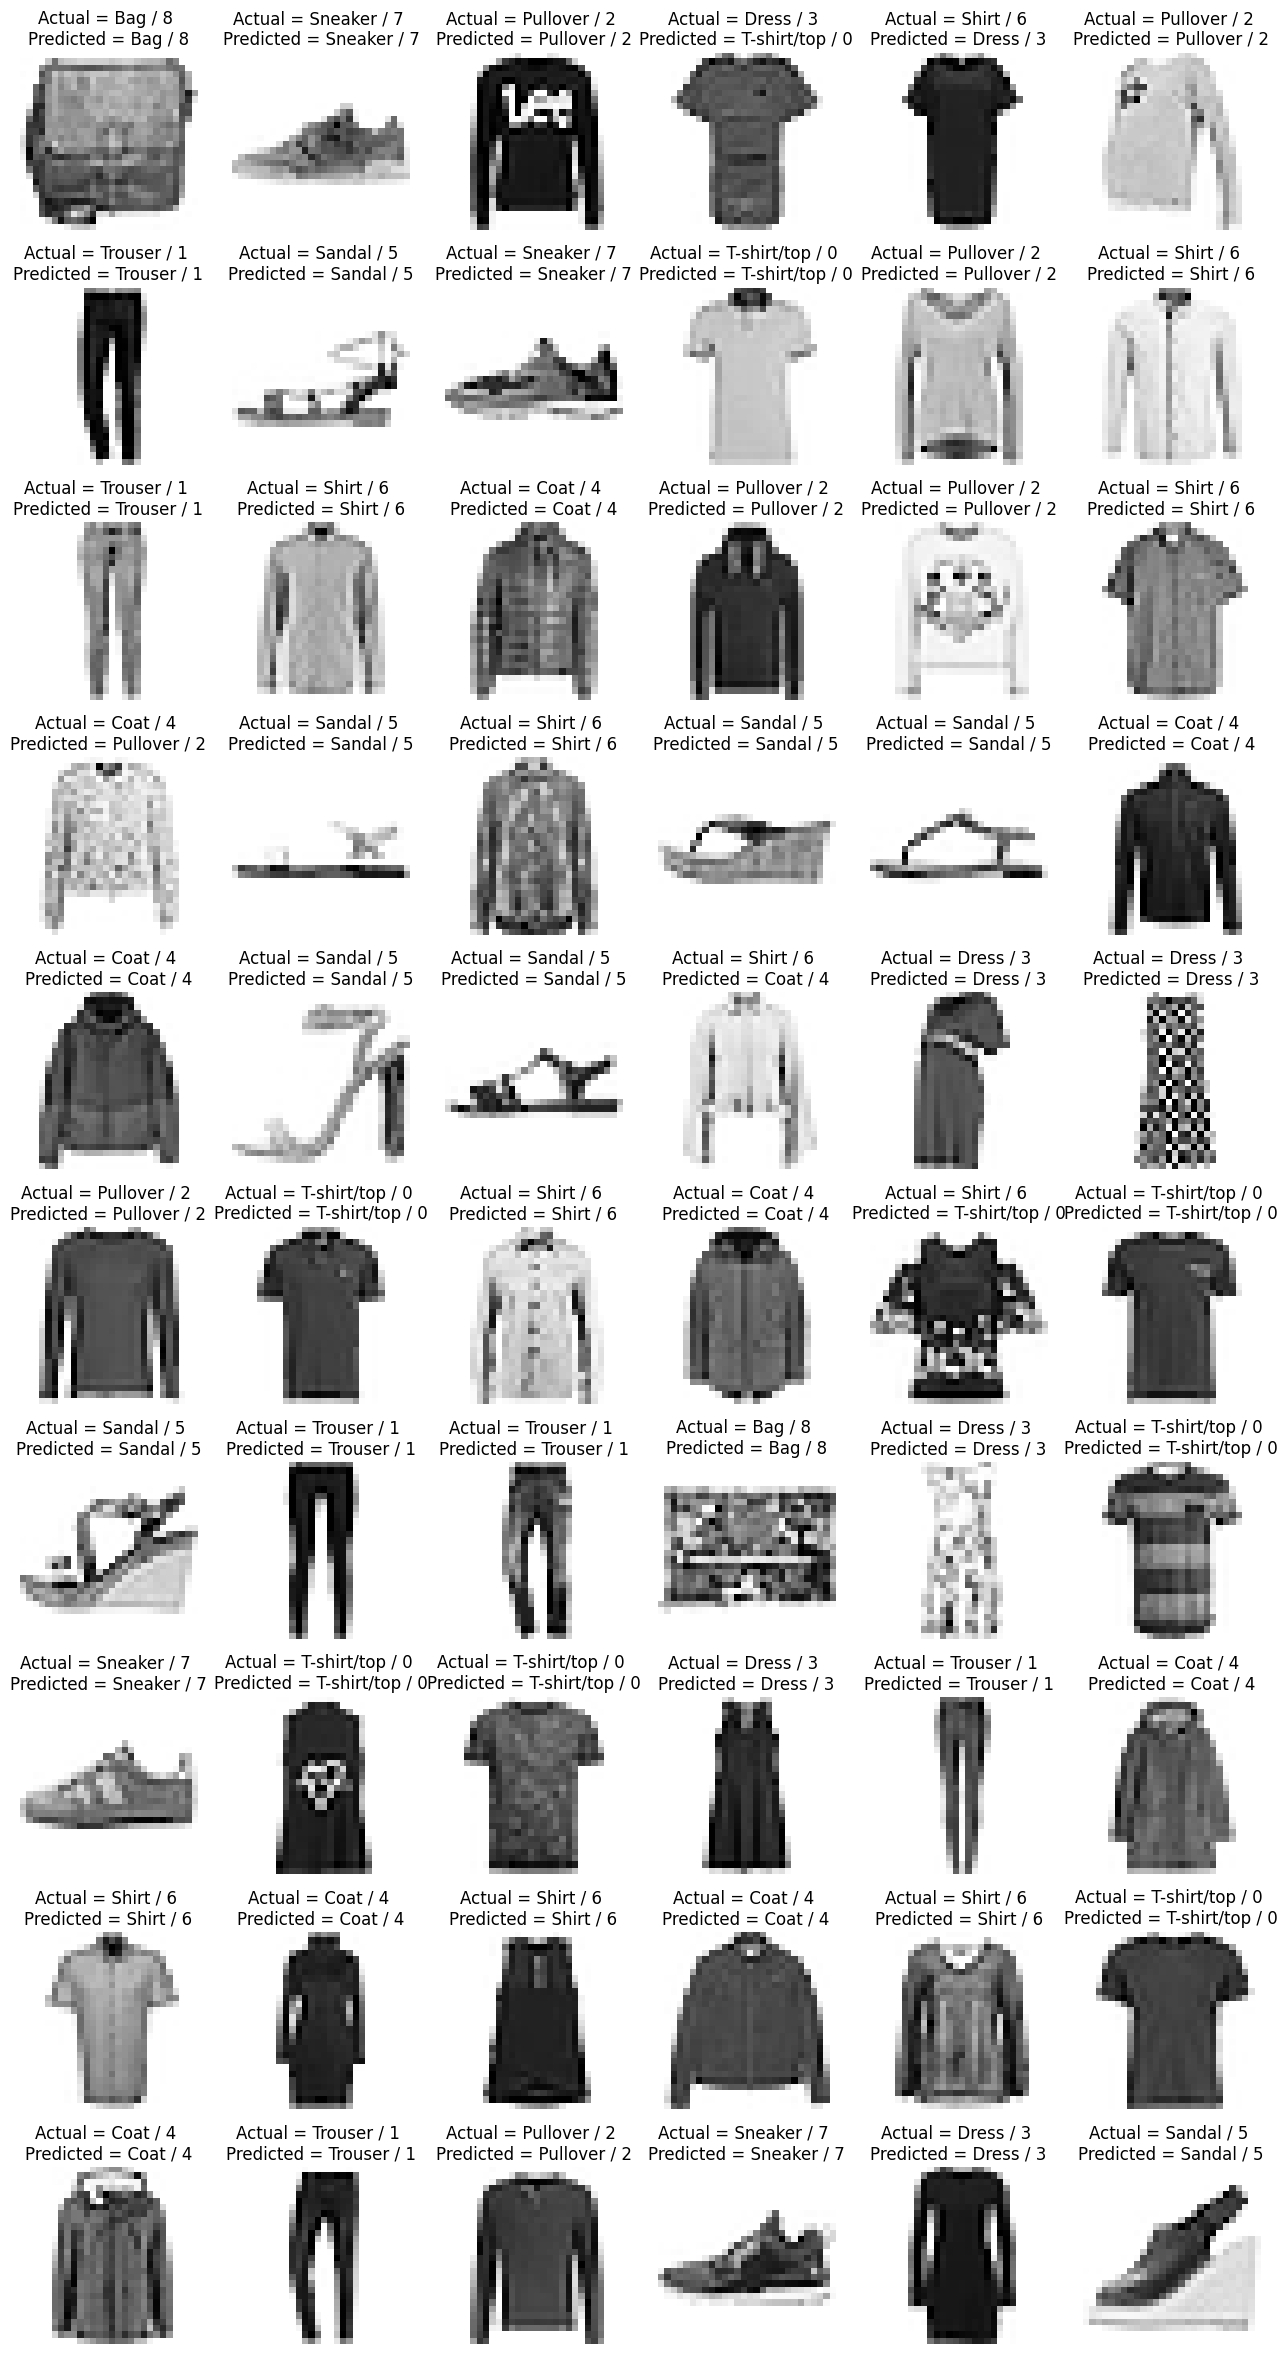

In [24]:
#Visuliazing the ouput


plt.figure(figsize=(16,30))


j=1
for i in np.random.randint(0, 1000,60):
    plt.subplot(10,6, j);
    j+=1
    plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
    plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
    plt.axis('off')

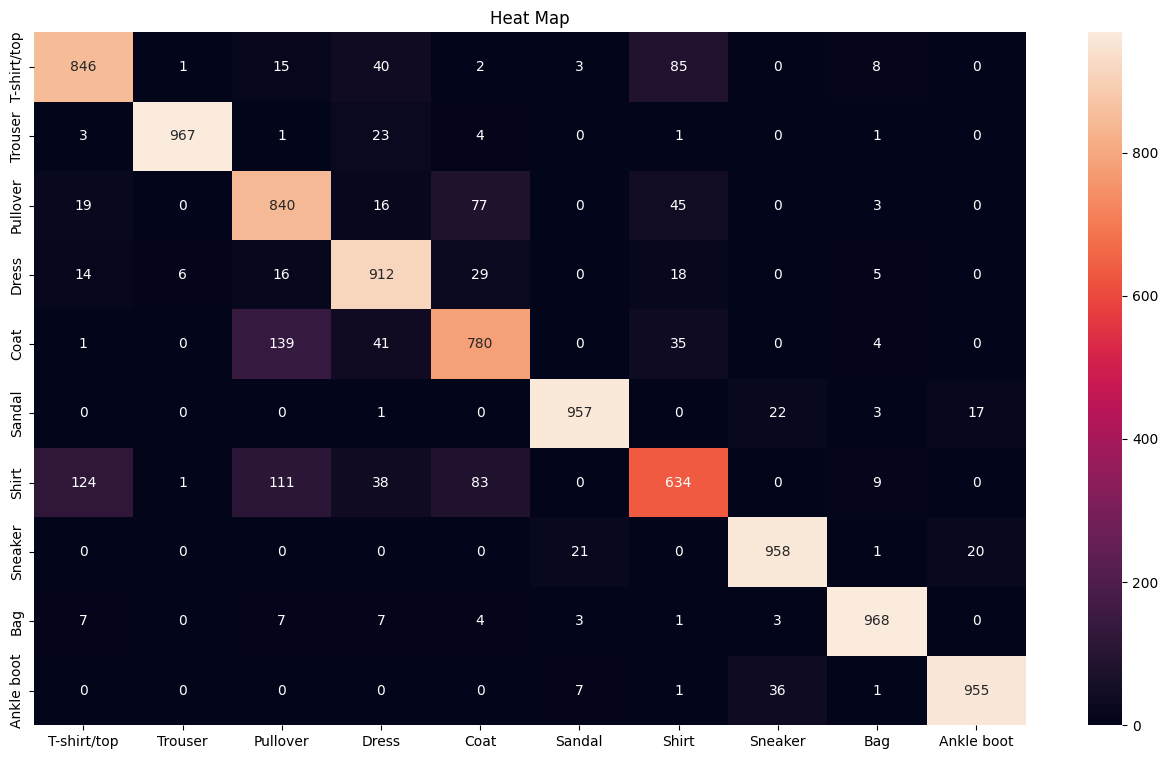

In [25]:
#Confusion Matrix


from sklearn.metrics import confusion_matrix


plt.figure(figsize=(16,9))
plt.title('Heat Map')
y_pred_labels = [ np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test,y_pred_labels)


#show cm
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels);

In [26]:
#Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.85      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.74      0.84      0.79      1000
       Dress       0.85      0.91      0.88      1000
        Coat       0.80      0.78      0.79      1000
      Sandal       0.97      0.96      0.96      1000
       Shirt       0.77      0.63      0.70      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
# expected conv2d_input to have 4 dimensions, but got array with shape (28, 28, 1)
# so we have increase the dimention 3 to 4
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [ ]:
X_train.ndim

4

#### Feature Scaling

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

#### Splitting Dataset


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [ ]:
print((X_train.shape),(y_train.shape))

(48000, 28, 28, 1) (48000,)


In [ ]:
print((X_validation.shape), (y_validation.shape))

(12000, 28, 28, 1) (12000,)


#### Model Building - CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D

In [ ]:
CNN_model = keras.models.Sequential([
                        keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid', activation= 'relu', input_shape=[28,28,1]),
                        keras.layers.MaxPooling2D(pool_size=(2,2)),
                        keras.layers.Flatten(),
                        keras.layers.Dense(units=128, activation='relu'),
                        keras.layers.Dense(units=10, activation='softmax')
                      ])

In [ ]:
#Summary
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
#Compiling the model
CNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Training CNN model
CNN_model.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/20
94/94 [==============================] - 2s 16ms/step - loss: 0.1920 - accuracy: 0.9320 - val_loss: 0.2512 - val_accuracy: 0.9118
Epoch 2/20
94/94 [==============================] - 1s 12ms/step - loss: 0.1830 - accuracy: 0.9337 - val_loss: 0.2682 - val_accuracy: 0.9083
Epoch 3/20
94/94 [==============================] - 1s 14ms/step - loss: 0.1732 - accuracy: 0.9388 - val_loss: 0.2525 - val_accuracy: 0.9128
Epoch 4/20
94/94 [==============================] - 1s 8ms/step - loss: 0.1680 - accuracy: 0.9407 - val_loss: 0.2500 - val_accuracy: 0.9122
Epoch 5/20
94/94 [==============================] - 1s 7ms/step - loss: 0.1576 - accuracy: 0.9444 - val_loss: 0.2530 - val_accuracy: 0.9147
Epoch 6/20
94/94 [==============================] - 1s 8ms/step - loss: 0.1520 - accuracy: 0.9456 - val_loss: 0.2509 - val_accuracy: 0.9134
Epoch 7/20
94/94 [==============================] - 1s 7ms/step - loss: 0.1421 - accuracy: 0.9508 - val_loss: 0.2511 - val_accuracy: 0.9122
Epoch 8/20
94/94 

#### Testing and Evaluating Model

In [ ]:
y_pred = CNN_model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 1s 2ms/step


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
CNN_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3217 - accuracy: 0.9064


[0.32170915603637695, 0.9064000248908997]

#### Visualizing the output

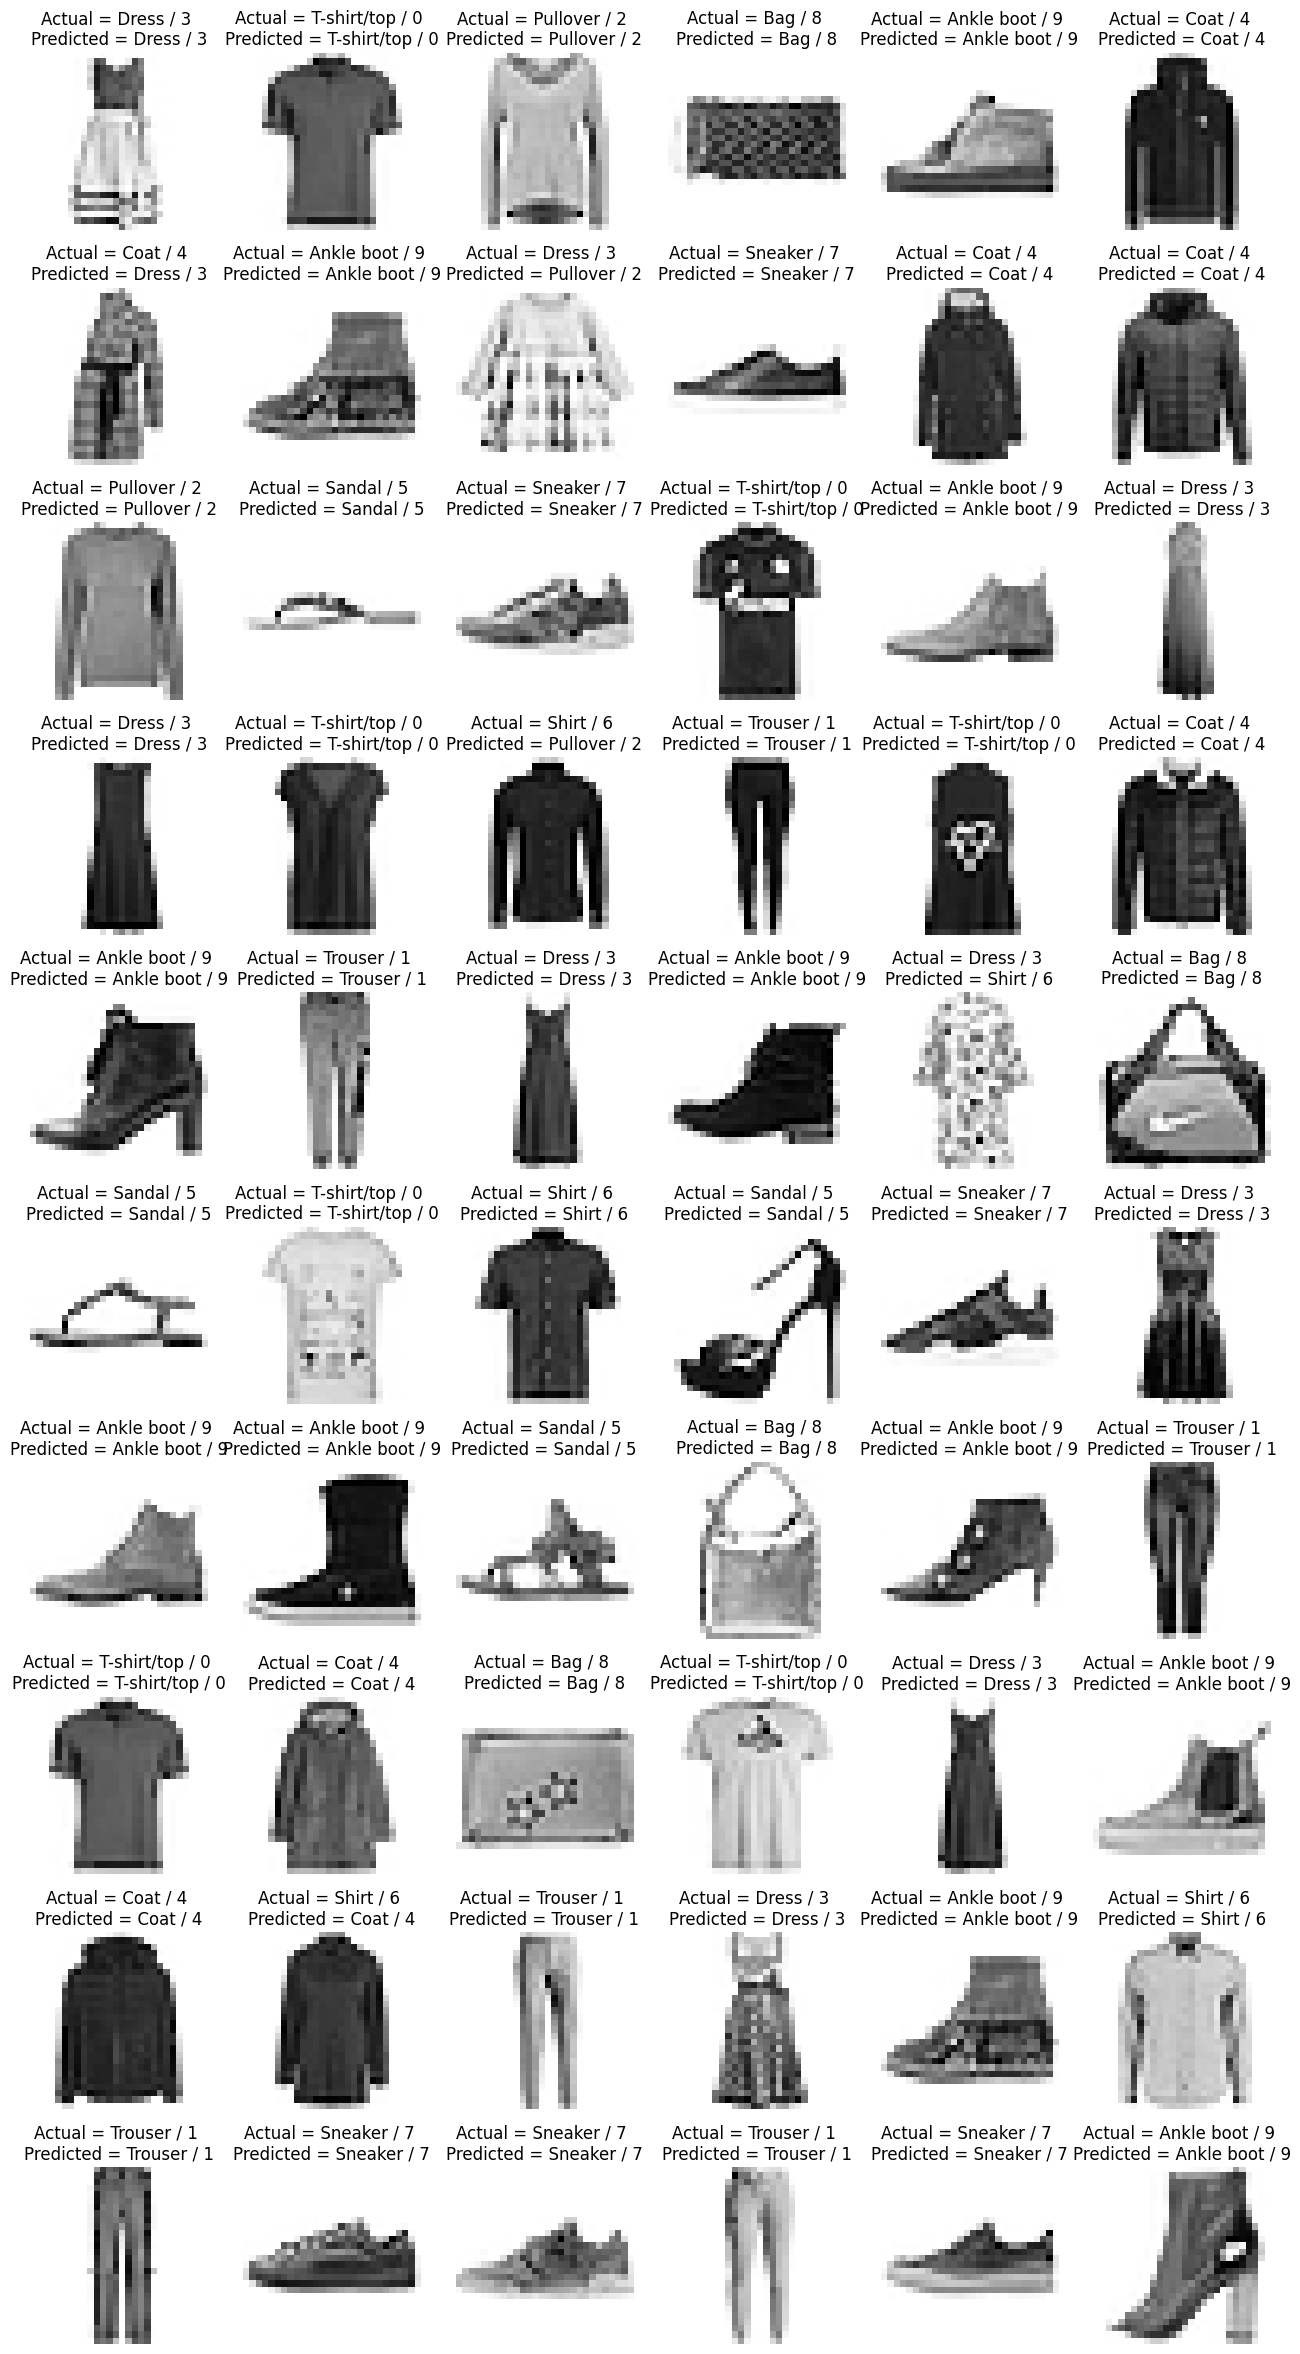

In [ ]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
    plt.subplot(10,6, j);
    j+=1
    plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
    plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
    plt.axis('off')

#### Confusion Matrix

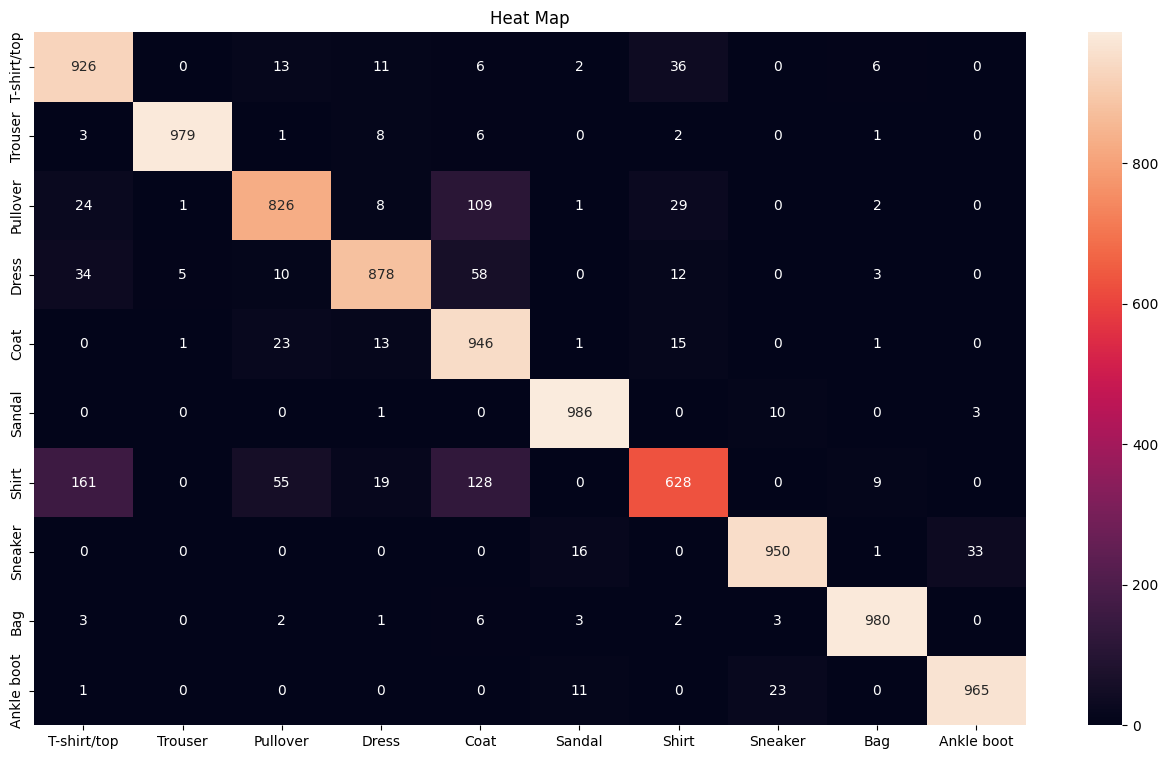

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
plt.title('Heat Map')
y_pred_labels = [ np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test,y_pred_labels)

#show cm
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels);

#### Classification Report

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.93      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.89      0.83      0.86      1000
       Dress       0.94      0.88      0.91      1000
        Coat       0.75      0.95      0.84      1000
      Sandal       0.97      0.99      0.98      1000
       Shirt       0.87      0.63      0.73      1000
     Sneaker       0.96      0.95      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



#### Saving the Model

In [ ]:
CNN_model.save('fashion_mnist_CNN_model.h5')

In [ ]:
#Load Model
fashion_mnist_CNN_model = keras.models.load_model('fashion_mnist_CNN_model.h5')

In [ ]:
Y_pred_sample = fashion_mnist_CNN_model.predict(np.expand_dims(X_test[0], axis=0)).round(2)
Y_pred_sample

1/1 [==============================] - 0s 57ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
np.argmax(Y_pred_sample[0])

9

In [ ]:
y_test[0]

9

#### Building Complex CNN Model2

In [ ]:
CNN_model2 = keras.models.Sequential([
                                      keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid', activation= 'relu', input_shape=[28,28,1] ),
                                      keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                                      keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      keras.layers.Flatten(),
                                      keras.layers.Dense(units=128,activation='relu'),
                                      keras.layers.Dropout(0.25),
                                      keras.layers.Dense(units=256,activation='relu'),
                                      keras.layers.Dropout(0.25),
                                      keras.layers.Dense(units=128,activation='relu'),
                                      keras.layers.Dense(units=10,activation='softmax')
                                      ])

In [ ]:
#Compiling the model
CNN_model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Training the model2

In [ ]:
CNN_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/20
94/94 [==============================] - 4s 13ms/step - loss: 1.0345 - accuracy: 0.6108 - val_loss: 0.5939 - val_accuracy: 0.7610
Epoch 2/20
94/94 [==============================] - 1s 9ms/step - loss: 0.5675 - accuracy: 0.7835 - val_loss: 0.4741 - val_accuracy: 0.8193
Epoch 3/20
94/94 [==============================] - 1s 9ms/step - loss: 0.4747 - accuracy: 0.8239 - val_loss: 0.4152 - val_accuracy: 0.8443
Epoch 4/20
94/94 [==============================] - 1s 9ms/step - loss: 0.4177 - accuracy: 0.8464 - val_loss: 0.3615 - val_accuracy: 0.8648
Epoch 5/20
94/94 [==============================] - 1s 9ms/step - loss: 0.3838 - accuracy: 0.8596 - val_loss: 0.3377 - val_accuracy: 0.8767
Epoch 6/20
94/94 [==============================] - 1s 9ms/step - loss: 0.3484 - accuracy: 0.8730 - val_loss: 0.3243 - val_accuracy: 0.8788
Epoch 7/20
94/94 [==============================] - 1s 9ms/step - loss: 0.3328 - accuracy: 0.8771 - val_loss: 0.3127 - val_accuracy: 0.8849
Epoch 8/20
94/94 [=

#### Testing and Evaluating Model2

In [ ]:
y_pred2 = CNN_model2.predict(X_test)
y_pred2.round(2)

313/313 [==============================] - 1s 2ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.89, 0.01, 0.  ]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
CNN_model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2615 - accuracy: 0.9073


[0.26147031784057617, 0.9072999954223633]

#### Visualizing the output for CNN Model2

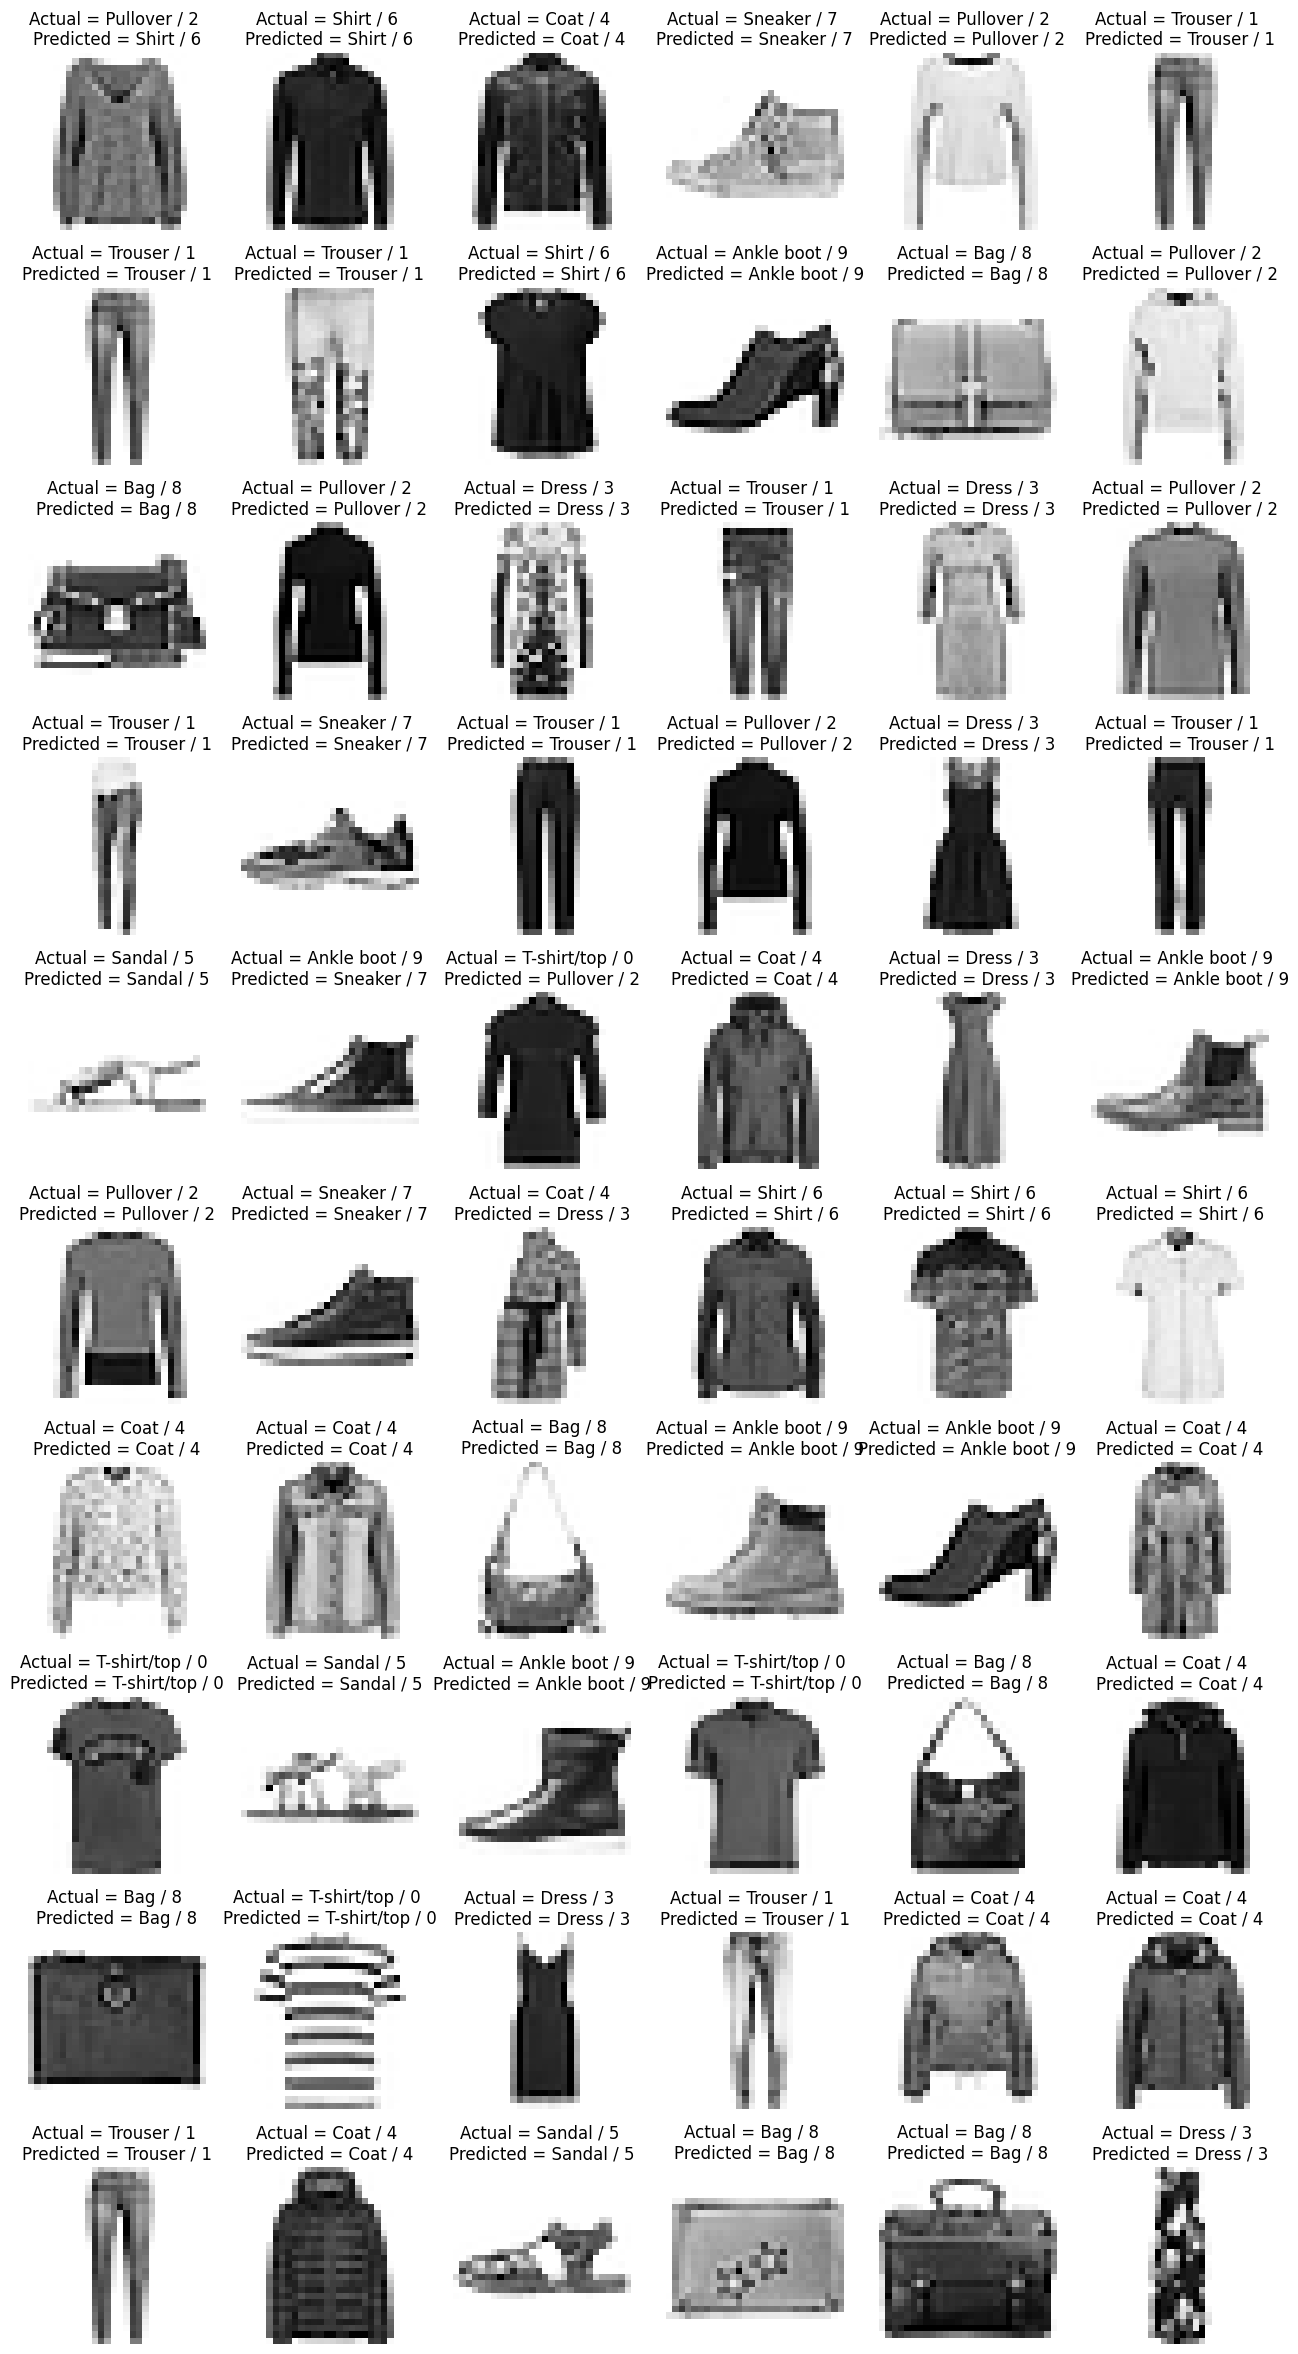

In [ ]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
    plt.subplot(10,6, j);
    j+=1
    plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
    plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred2[i])],np.argmax(y_pred2[i])))
    plt.axis('off')

#### Confusion Matrix for CNN Model2

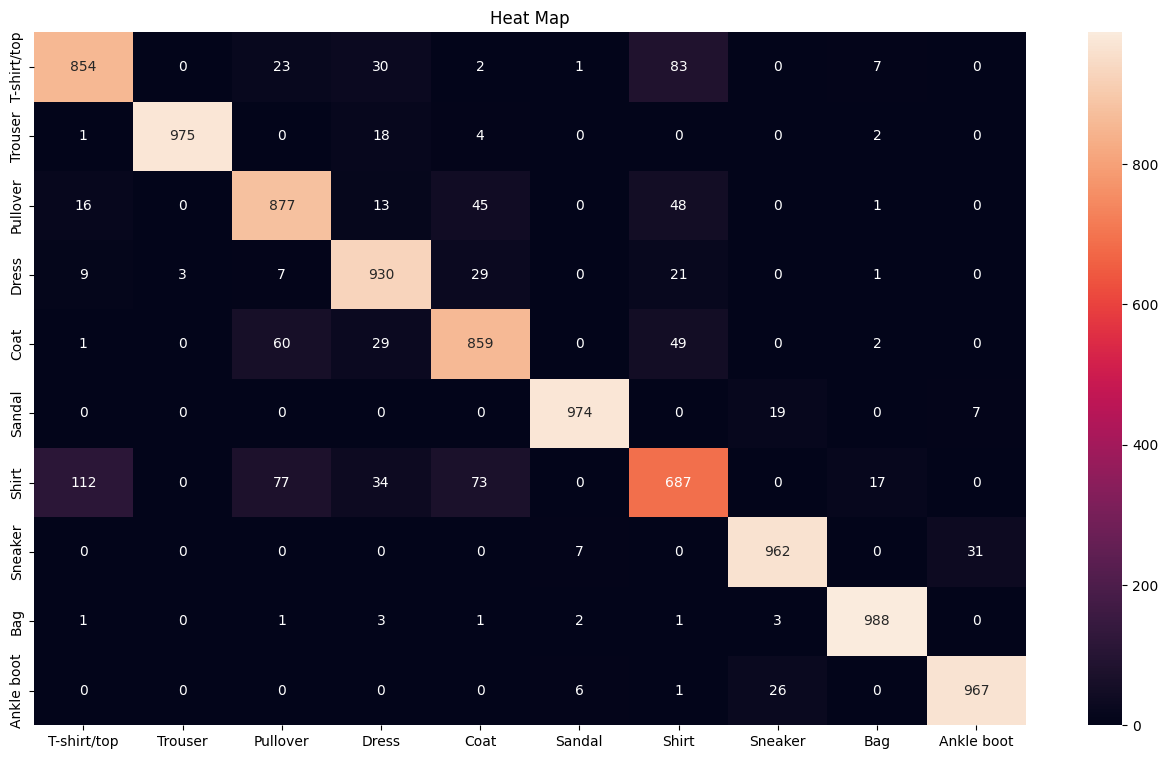

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
plt.title('Heat Map')
y_pred_labels = [ np.argmax(label) for label in y_pred2]
cm = confusion_matrix(y_test,y_pred_labels)

#show cm
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels);

#### Classification Report for CNN Model2

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.85      0.86      1000
     Trouser       1.00      0.97      0.99      1000
    Pullover       0.84      0.88      0.86      1000
       Dress       0.88      0.93      0.90      1000
        Coat       0.85      0.86      0.85      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.77      0.69      0.73      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.97      0.99      0.98      1000
  Ankle boot       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



#### Saving the CNN Model 2

In [ ]:
CNN_model2.save('fashion_mnist_CNN_model.h5')

#### Building Complex CNN Model3

In [ ]:
#Building CNN model
CNN_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [ ]:
#Compiling the model
CNN_model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Training and Evaluating CNN Model3

In [ ]:
#Training the model
CNN_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/50
94/94 [==============================] - 4s 19ms/step - loss: 1.1898 - accuracy: 0.5349 - val_loss: 0.5991 - val_accuracy: 0.7654
Epoch 2/50
94/94 [==============================] - 2s 16ms/step - loss: 0.5704 - accuracy: 0.7871 - val_loss: 0.4439 - val_accuracy: 0.8380
Epoch 3/50
94/94 [==============================] - 2s 16ms/step - loss: 0.4608 - accuracy: 0.8335 - val_loss: 0.3736 - val_accuracy: 0.8642
Epoch 4/50
94/94 [==============================] - 2s 17ms/step - loss: 0.3938 - accuracy: 0.8595 - val_loss: 0.3349 - val_accuracy: 0.8784
Epoch 5/50
94/94 [==============================] - 2s 16ms/step - loss: 0.3546 - accuracy: 0.8745 - val_loss: 0.3294 - val_accuracy: 0.8845
Epoch 6/50
94/94 [==============================] - 2s 16ms/step - loss: 0.3276 - accuracy: 0.8841 - val_loss: 0.3073 - val_accuracy: 0.8899
Epoch 7/50
94/94 [==============================] - 1s 16ms/step - loss: 0.3029 - accuracy: 0.8955 - val_loss: 0.2962 - val_accuracy: 0.8957
Epoch 8/50
94

#### Testing and Evaluating CNN Model3

In [ ]:
y_pred3 = CNN_model3.predict(X_test)
y_pred3.round(2)

313/313 [==============================] - 1s 2ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.07, 0.  , 0.  ]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
CNN_model3.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5030 - accuracy: 0.9053


[0.5029658675193787, 0.9053000211715698]

#### Visualizing the output CNN Model3

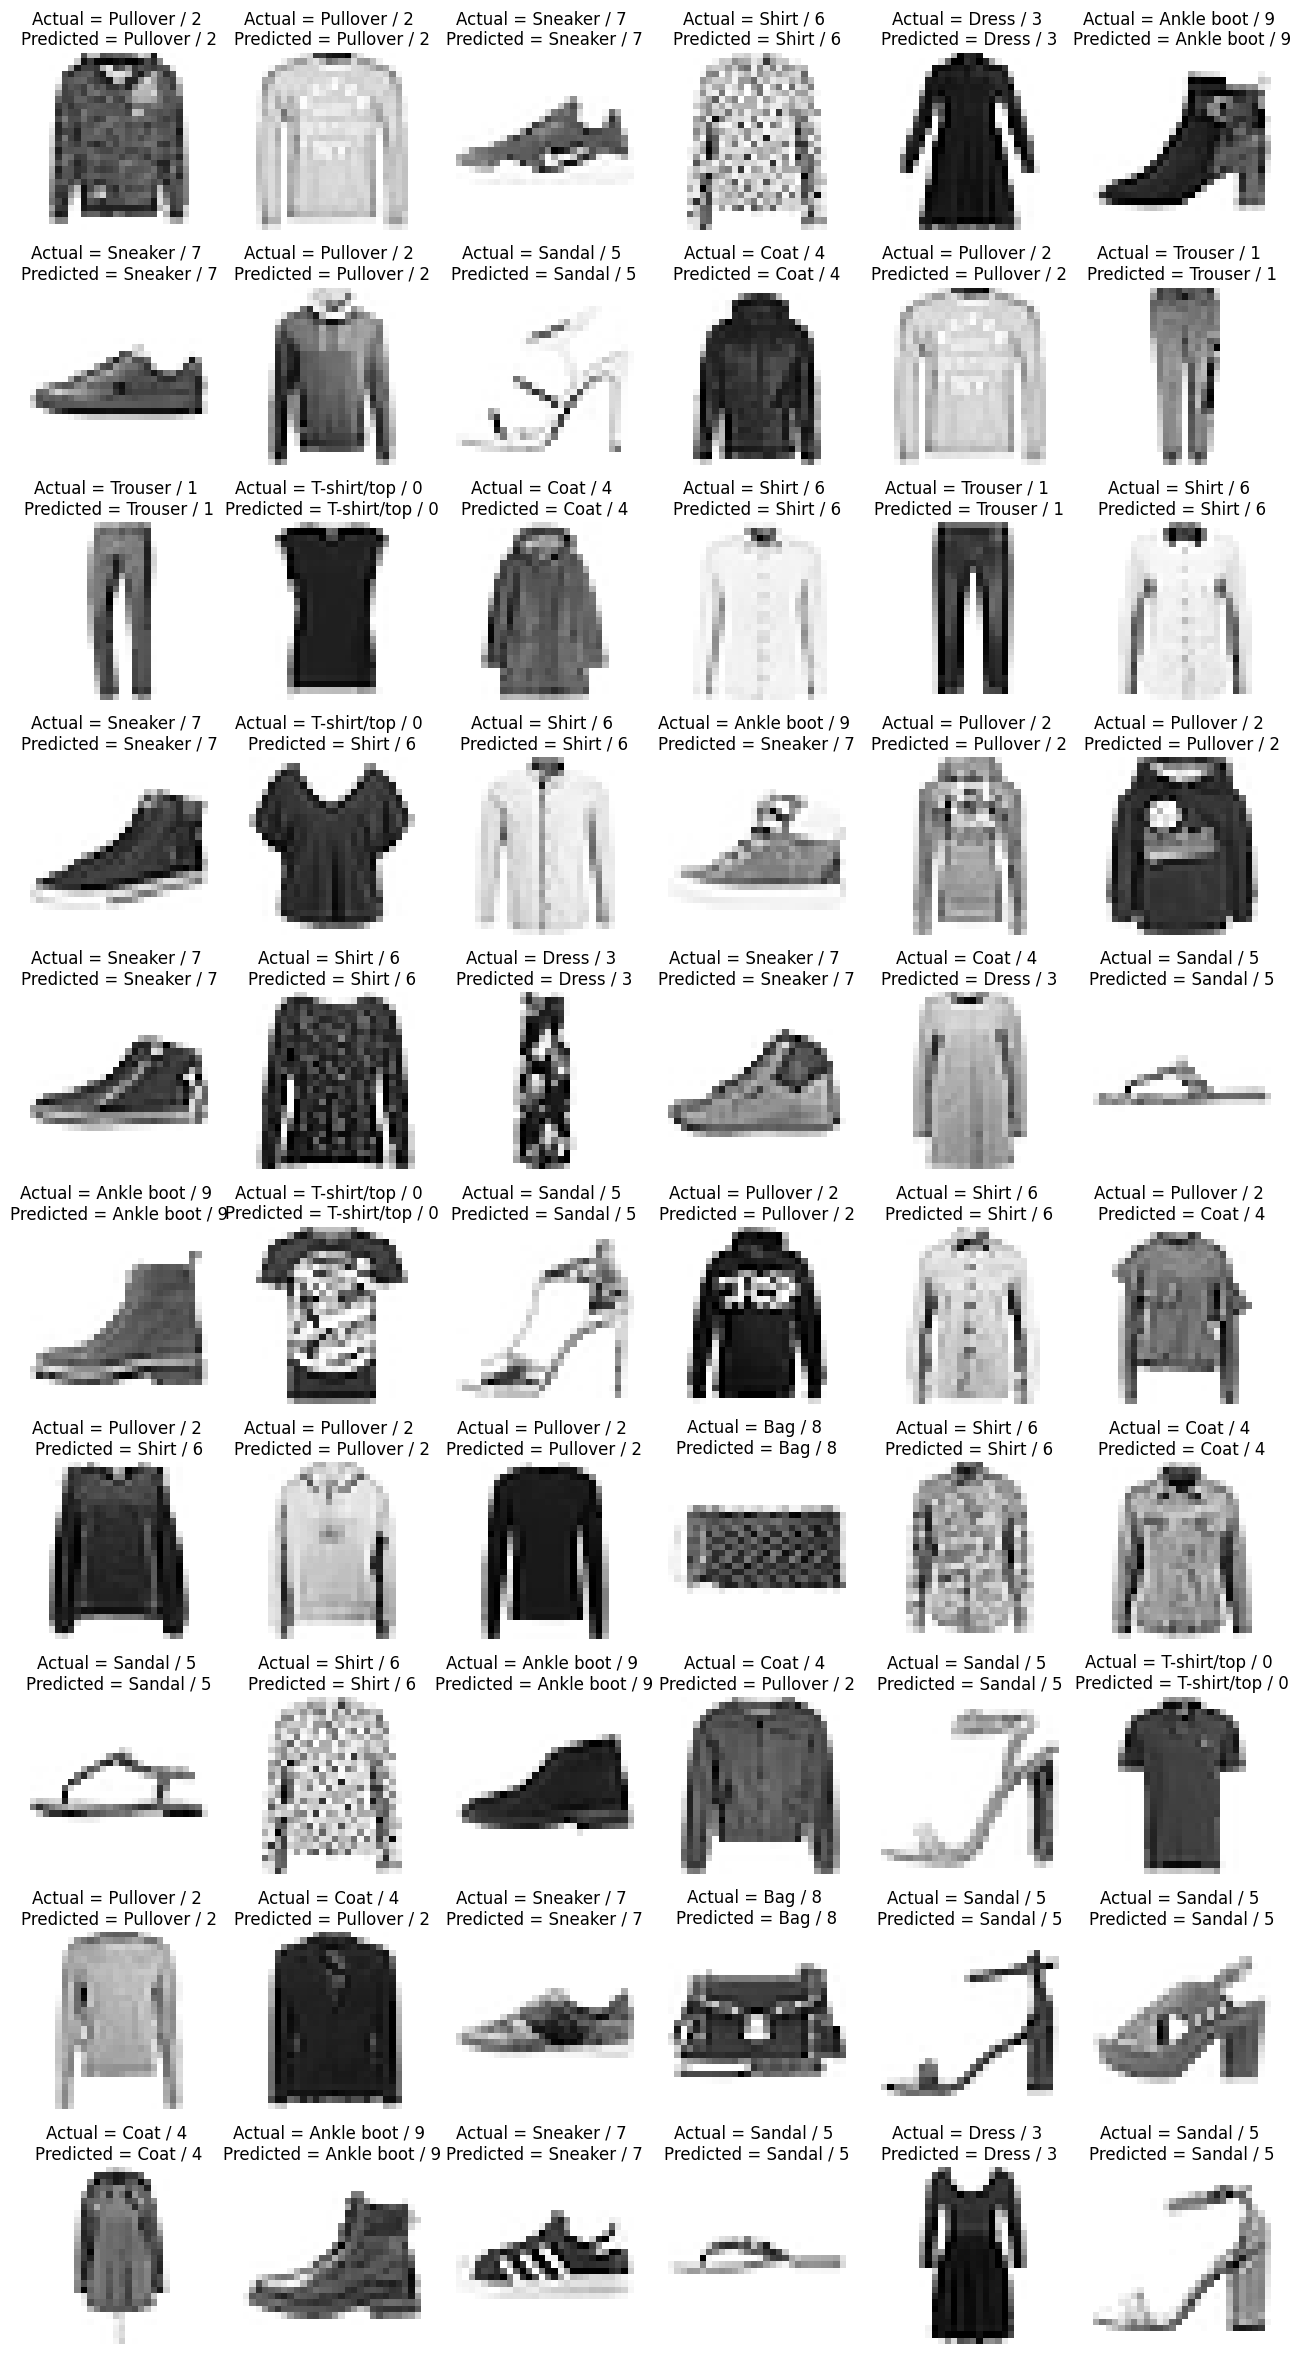

In [ ]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
    plt.subplot(10,6, j);
    j+=1
    plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
    plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred3[i])],np.argmax(y_pred3[i])))
    plt.axis('off')

#### Confusion Matrix for CNN Model3

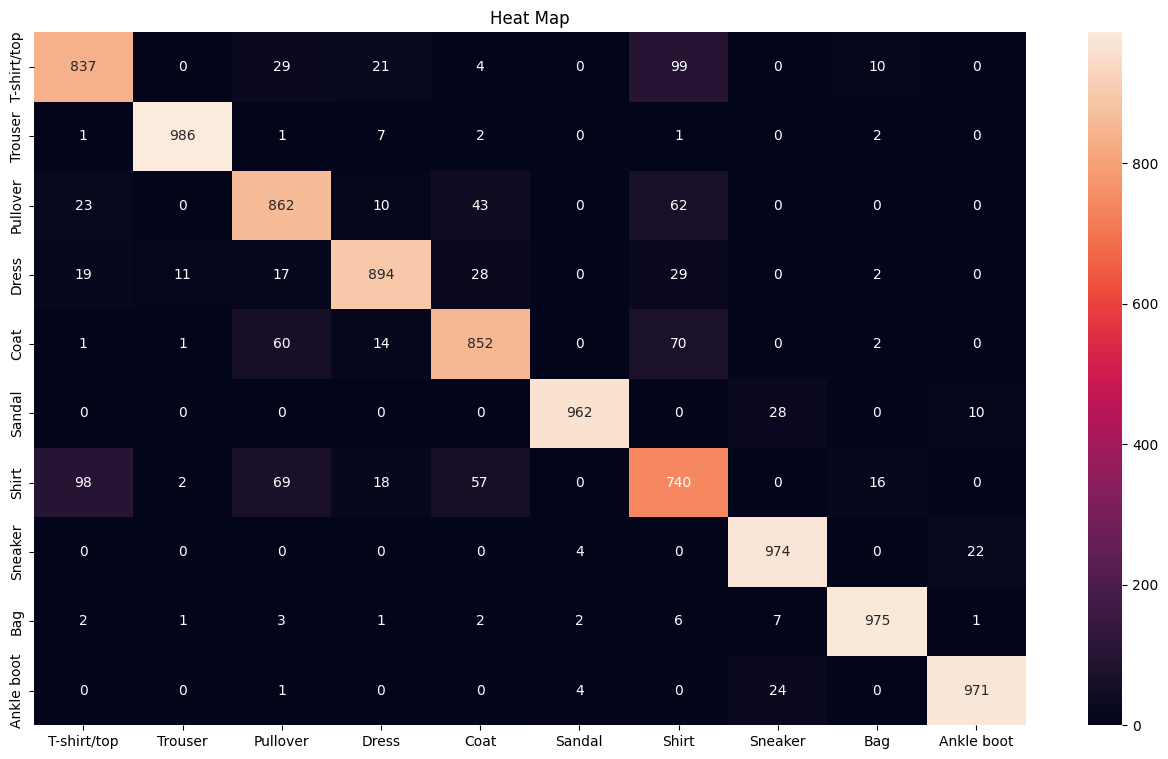

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
plt.title('Heat Map')
y_pred_labels = [ np.argmax(label) for label in y_pred3]
cm = confusion_matrix(y_test,y_pred_labels)

#show cm
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels);

#### Classification for CNN Model3

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.84      0.85      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.83      0.86      0.84      1000
       Dress       0.93      0.89      0.91      1000
        Coat       0.86      0.85      0.86      1000
      Sandal       0.99      0.96      0.98      1000
       Shirt       0.73      0.74      0.74      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



#### Saving CNN Model3

In [ ]:
CNN_model3.save('fashion_mnist_CNN_model.h5')

#### Conclusion

Upon adding complexity such as adding more filters, more maxpooling layers, dropouts etc., the model's accuracy is increasing